<a href="https://colab.research.google.com/github/NEELANATARAJAN/pytorch_deeplearning/blob/main/projects/02_pytorch_classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 02. Neural Network classification with PyTorch
Classification is a problem of predicting whether something is one thing or another
(there can be multiple things as the options).

## 1. Make classification data and get it ready

In [ ]:
import sklearn
from sklearn.datasets import make_circles

# Make samples
n_samples = 1000

# Create circles
X, y = make_circles(n_samples,
                    noise=0.03,
                    random_state=42)

In [ ]:
X[:5], y[:5]

(array([[ 0.75424625,  0.23148074],
        [-0.75615888,  0.15325888],
        [-0.81539193,  0.17328203],
        [-0.39373073,  0.69288277],
        [ 0.44220765, -0.89672343]]),
 array([1, 1, 1, 1, 0]))

### Visualize, Visualize & Visualize

In [ ]:
import pandas as pd
circles = pd.DataFrame({"X1": X[:,0],
                        "X2": X[:,1],
                        "label": y})
circles.head(10)

,X1,X2,label
0,0.754246,0.231481,1
1,-0.756159,0.153259,1
2,-0.815392,0.173282,1
3,-0.393731,0.692883,1
4,0.442208,-0.896723,0
5,-0.479646,0.676435,1
6,-0.013648,0.803349,1
7,0.771513,0.147760,1
8,-0.169322,-0.793456,1
9,-0.121486,1.021509,0


In [ ]:
circles.label.value_counts()

,count
label,
1,500
0,500


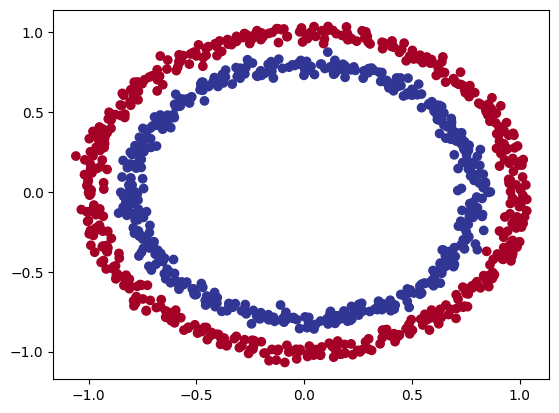

In [ ]:
import matplotlib.pyplot as plt
plt.scatter(x=X[:,0],
            y=X[:,1],
            c=y,
            cmap=plt.cm.RdYlBu)

### Check input and output shapes


In [ ]:
X.shape, y.shape, X[0:5], y[0:5]

((1000, 2),
 (1000,),
 array([[ 0.75424625,  0.23148074],
        [-0.75615888,  0.15325888],
        [-0.81539193,  0.17328203],
        [-0.39373073,  0.69288277],
        [ 0.44220765, -0.89672343]]),
 array([1, 1, 1, 1, 0]))

In [ ]:
X_samples = X[0]
y_samples = y[0]

print(f"Values for one of the samples of X {X_samples} and the same for y: {y_samples}")


Values for one of the samples of X [0.75424625 0.23148074] and the same for y: 1


### Turning data into tensors

In [ ]:
import torch
print(torch.__version__)

2.5.1+cu121


In [ ]:
type(X), type(y)

(numpy.ndarray, numpy.ndarray)

In [ ]:
X = torch.from_numpy(X).type(torch.float)
y = torch.from_numpy(y).type(torch.float)

print(X[:5], y[:5])
print(f"X dtype: {X.dtype}, y dtype: {y.dtype}")

tensor([[ 0.7542,  0.2315],
        [-0.7562,  0.1533],
        [-0.8154,  0.1733],
        [-0.3937,  0.6929],
        [ 0.4422, -0.8967]]) tensor([1., 1., 1., 1., 0.])
X dtype: torch.float32, y dtype: torch.float32


In [ ]:
type(X), type(y)

(torch.Tensor, torch.Tensor)

### Splitting the data in train, test

In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X,
                                                    y,
                                                    test_size=0.2,
                                                    random_state=42)
print(len(X_train), len(X_test), len(y_train), len(y_test))
print(X_train[:5], y_train[:5])

800 200 800 200
tensor([[ 0.6579, -0.4651],
        [ 0.6319, -0.7347],
        [-1.0086, -0.1240],
        [-0.9666, -0.2256],
        [-0.1666,  0.7994]]) tensor([1., 0., 0., 0., 1.])


## 2. Building a model

Let's build a model to classify our blue and red dots.

To do so, we want to:
1. Setup device agnostic code so our code will run in CPU and GPU
2. Construct a model (by subclassing nn.Module)
3. Define loss function & optimizer
4. Create training and testing loop

In [ ]:
# Import PyTorch and nn
import torch
from torch import nn

# Make device agnostic code
device = "cuda" if torch.cuda.is_available() else "cpu"
device

'cpu'

Now we have setup device, we create a model:
1. Subclass `nn.Module`
2. Create 2 `nn.Linear` layers capable of handling any shapes
3. Define `forward()` method that outlines the forward pass or forward computation
4. Instantiate an instance of the model class and send it to the target `device`

In [ ]:
class CircleModelV0(nn.Module):
  def __init__(self):
    super().__init__()
    self.Layer_1 = nn.Linear(in_features=2, out_features=5)
    self.Layer_2 = nn.Linear(in_features=5, out_features=1)

  def forward(self, x:torch.Tensor) -> torch.Tensor:
    return self.Layer_2(self.Layer_1(x))

model_0 = CircleModelV0()
model_0.to(device)

CircleModelV0(
  (Layer_1): Linear(in_features=2, out_features=5, bias=True)
  (Layer_2): Linear(in_features=5, out_features=1, bias=True)
)

In [ ]:
device

'cuda'

In [ ]:
next(model_0.parameters()).device

device(type='cuda', index=0)

In [ ]:
model_0 = nn.Sequential(
    nn.Linear(in_features=2, out_features=5),
    nn.Linear(in_features=5, out_features=1)
)

In [ ]:
model_0.parameters()

<generator object Module.parameters at 0x7b0a09a6a570>

In [ ]:
next(model_0.parameters()).device

device(type='cpu')

In [ ]:
model_0.state_dict()

OrderedDict([('0.weight',
              tensor([[-0.0829, -0.2872],
                      [ 0.4691, -0.5582],
                      [-0.3260, -0.1997],
                      [-0.4252,  0.0667],
                      [-0.6984,  0.6386]])),
             ('0.bias', tensor([-0.6007,  0.5459,  0.1177, -0.2296,  0.4370])),
             ('1.weight',
              tensor([[ 0.0697,  0.3613,  0.0489, -0.1410,  0.1202]])),
             ('1.bias', tensor([-0.1213]))])

In [ ]:
device

'cuda'

In [ ]:
# Make predictions
model_0=model_0.to(device)
print(f"device is :{device}")

X_test = X_test.to(device)
print(f"X_test device: {X_test.device}")

with torch.inference_mode():
  untrained_preds = model_0(X_test.to(device))

print(f"Length of untrained predictions: {len(untrained_preds)} and shape {untrained_preds.shape}")
print(f"Length of input: {len(X_test)} and shape {X_test.shape}")
print(f"\nFirst 10 predictions: {untrained_preds[:10]}")
print(f"First 10 labels: {y_test[:10]}")

device is :cuda
X_test device: cuda:0
Length of untrained predictions: 200 and shape torch.Size([200, 1])
Length of input: 200 and shape torch.Size([200, 2])

First 10 predictions: tensor([[-0.0338],
        [-0.0309],
        [ 0.0894],
        [-0.0692],
        [ 0.2967],
        [ 0.2968],
        [ 0.1405],
        [ 0.2178],
        [ 0.0805],
        [-0.0284]], device='cuda:0')
First 10 labels: tensor([1., 0., 1., 0., 1., 1., 0., 0., 1., 0.])


In [ ]:
untrained_preds.is_cuda

True

In [ ]:
X_test.is_cuda

True

In [ ]:
# Setup the loss function
loss_fn = nn.BCEWithLogitsLoss()
optimizer = torch.optim.SGD(params=model_0.parameters(),
                            lr=0.01)

In [ ]:
model_0.state_dict()

OrderedDict([('0.weight',
              tensor([[-0.0829, -0.2872],
                      [ 0.4691, -0.5582],
                      [-0.3260, -0.1997],
                      [-0.4252,  0.0667],
                      [-0.6984,  0.6386]], device='cuda:0')),
             ('0.bias',
              tensor([-0.6007,  0.5459,  0.1177, -0.2296,  0.4370], device='cuda:0')),
             ('1.weight',
              tensor([[ 0.0697,  0.3613,  0.0489, -0.1410,  0.1202]], device='cuda:0')),
             ('1.bias', tensor([-0.1213], device='cuda:0'))])

In [ ]:
print(torch.eq(torch.Tensor([[1,2],[3,4]]), torch.Tensor([[1,2],[4,4]])))
print(torch.eq(torch.Tensor([[1,2],[3,4]]), torch.Tensor([[1,2],[4,4]])).sum())
print(torch.eq(torch.Tensor([[1,2],[3,4]]), torch.Tensor([[1,2],[4,4]])).sum().item())

tensor([[ True,  True],
        [False,  True]])
tensor(3)
3


In [ ]:
# Calculate accuracy - out of 100 examples, what percentage does our model get right?
def accuracy_fn(y_true, y_pred):
  correct = torch.eq(y_true, y_pred).sum().item()
  accuracy = (correct/len(y_pred))*100
  return accuracy

### Training Model
1. Forward Pass (train the model)
2. Calculate the loss - loss = loss_fn(pred, train)
3. Zero the gradients - optimizer.zero_grad
4. Backpropagate - loss.backward
5. Gradient descent - Optimizer.step

### Going from raw logits -> prediction probabilities -> prediction labels
Our model outputs are going to be logits
We can convert the logits into prediction probabilities by passing through some kind of activation function
 (sigmoid for binary and softmax for multiclass)
We convert the prediction probabilities into prediction labels by rounding them with argmax()

In [ ]:
model_0.eval()

with torch.inference_mode():
  y_logits = model_0(X_test.to(device))

y_logits[:10]

tensor([[-0.0338],
        [-0.0309],
        [ 0.0894],
        [-0.0692],
        [ 0.2967],
        [ 0.2968],
        [ 0.1405],
        [ 0.2178],
        [ 0.0805],
        [-0.0284]], device='cuda:0')

In [ ]:
# Use sigmoid activation function on logits for getting the prediction probabilities
y_pred_probs = torch.sigmoid(y_logits)
y_pred_probs[:10]

tensor([[0.4916],
        [0.4923],
        [0.5223],
        [0.4827],
        [0.5736],
        [0.5737],
        [0.5351],
        [0.5542],
        [0.5201],
        [0.4929]], device='cuda:0')

In [ ]:
# Predict labels from prediction probabilities
y_preds = torch.round(y_pred_probs)
print(y_preds[:10])
print(y_test[:10])

tensor([[0.],
        [0.],
        [1.],
        [0.],
        [1.],
        [1.],
        [1.],
        [1.],
        [1.],
        [0.]], device='cuda:0')
tensor([1., 0., 1., 0., 1., 1., 0., 0., 1., 0.])


In [ ]:
y_pred_labels = torch.round(torch.sigmoid(model_0(X_test.to(device))))
print(torch.eq(y_preds.squeeze(), y_pred_labels.squeeze()))
y_preds.squeeze()

tensor([True, True, True, True, True, True, True, True, True, True, True, True,
        True, True, True, True, True, True, True, True, True, True, True, True,
        True, True, True, True, True, True, True, True, True, True, True, True,
        True, True, True, True, True, True, True, True, True, True, True, True,
        True, True, True, True, True, True, True, True, True, True, True, True,
        True, True, True, True, True, True, True, True, True, True, True, True,
        True, True, True, True, True, True, True, True, True, True, True, True,
        True, True, True, True, True, True, True, True, True, True, True, True,
        True, True, True, True, True, True, True, True, True, True, True, True,
        True, True, True, True, True, True, True, True, True, True, True, True,
        True, True, True, True, True, True, True, True, True, True, True, True,
        True, True, True, True, True, True, True, True, True, True, True, True,
        True, True, True, True, True, Tr

tensor([0., 0., 1., 0., 1., 1., 1., 1., 1., 0., 0., 0., 1., 1., 1., 1., 1., 0.,
        0., 0., 0., 1., 0., 0., 1., 1., 1., 1., 1., 1., 1., 1., 0., 1., 0., 1.,
        0., 1., 1., 1., 0., 1., 1., 1., 0., 1., 1., 0., 1., 1., 0., 0., 1., 1.,
        1., 1., 1., 1., 0., 0., 1., 1., 0., 1., 0., 0., 1., 1., 0., 1., 1., 1.,
        0., 1., 1., 1., 1., 1., 0., 1., 0., 0., 1., 1., 0., 1., 1., 1., 1., 1.,
        1., 1., 1., 1., 1., 0., 1., 1., 0., 1., 0., 1., 1., 1., 0., 1., 1., 1.,
        1., 1., 0., 0., 1., 1., 1., 1., 1., 1., 1., 1., 0., 1., 1., 0., 1., 1.,
        1., 1., 0., 1., 1., 1., 1., 0., 1., 1., 1., 1., 0., 1., 1., 1., 0., 1.,
        1., 1., 1., 1., 1., 0., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 0., 1.,
        1., 0., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
        1., 1., 1., 1., 0., 0., 0., 1., 0., 1., 0., 1., 1., 1., 1., 1., 0., 1.,
        0., 1.], device='cuda:0')

In [ ]:
y_test[:10]

tensor([1., 0., 1., 0., 1., 1., 0., 0., 1., 0.])

### Building a training and testing loop

In [ ]:
torch.manual_seed(42)
torch.cuda.manual_seed(42)

# Set the number of epochs
epochs = 100

#Put the data into target device
X_train, y_train = X_train.to(device), y_train.to(device)
X_test, y_test = X_test.to(device), y_test.to(device)

# Build training loop
for epoch in range(epochs):
  # training the model
  model_0.train()

  # 1. Optimizer zero_grad
  optimizer.zero_grad()

  # 2. Forward Pass
  y_logits = model_0(X_train).squeeze()
  y_pred = torch.round(torch.sigmoid(y_logits))

  # 3. Calculate loss
  loss = loss_fn(y_logits, y_train) # nn.BCEWithLogitsLoss expects raw logits as input
  accuracy = accuracy_fn(y_true=y_train, y_pred=y_pred) # calculates the accuracy of the model

  # 4. Backpropagation
  loss.backward()

  # 5. Optimizer step - Gradient Descent
  optimizer.step()

  ### Testing model
  model_0.eval()

  with torch.inference_mode():
    test_logits = model_0(X_test).squeeze()
    test_pred = torch.round(torch.sigmoid(test_logits))
    test_loss = loss_fn(test_logits, y_test)
    test_acc = accuracy_fn(y_true=y_test, y_pred=test_pred)

  if epoch % 10 ==0:
    print(f"Epoch: {epoch} | Loss: {loss:.5f} | Accuracy: {accuracy:.2f}% | Test_loss: {test_loss:.5f} | Test_accuracy: {test_acc:.2f}% ")


Epoch: 0 | Loss: 0.69796 | Accuracy: 51.88% | Test_loss: 0.69460 | Test_accuracy: 57.50% 
Epoch: 10 | Loss: 0.69768 | Accuracy: 52.00% | Test_loss: 0.69438 | Test_accuracy: 58.00% 
Epoch: 20 | Loss: 0.69742 | Accuracy: 52.00% | Test_loss: 0.69418 | Test_accuracy: 57.50% 
Epoch: 30 | Loss: 0.69717 | Accuracy: 52.00% | Test_loss: 0.69401 | Test_accuracy: 56.50% 
Epoch: 40 | Loss: 0.69695 | Accuracy: 51.62% | Test_loss: 0.69385 | Test_accuracy: 56.50% 
Epoch: 50 | Loss: 0.69675 | Accuracy: 51.38% | Test_loss: 0.69370 | Test_accuracy: 56.00% 
Epoch: 60 | Loss: 0.69656 | Accuracy: 51.38% | Test_loss: 0.69357 | Test_accuracy: 56.00% 
Epoch: 70 | Loss: 0.69638 | Accuracy: 51.38% | Test_loss: 0.69345 | Test_accuracy: 56.50% 
Epoch: 80 | Loss: 0.69621 | Accuracy: 51.25% | Test_loss: 0.69334 | Test_accuracy: 56.50% 
Epoch: 90 | Loss: 0.69606 | Accuracy: 51.38% | Test_loss: 0.69324 | Test_accuracy: 55.00% 


## 4. Make predictions and evaluate the model

From the metrics it looks like our model is not learning anything
So to inspect it lets make some predictions and make them visual !

Visualize... visualize... visualize...

To do so we are going to use a function called `plot_decision_boundary`

In [ ]:
import requests

In [ ]:
from pathlib import Path

if Path("helper_functions.py").is_file():
  print("helper_functions.py already exists")
else:
  print("Downloading helper_functions.py")
  request = requests.get("https://raw.githubusercontent.com/mrdbourke/pytorch-deep-learning/refs/heads/main/helper_functions.py")
  with open("helper_functions.py", "wb") as f:
    f.write(request.content)


helper_functions.py already exists


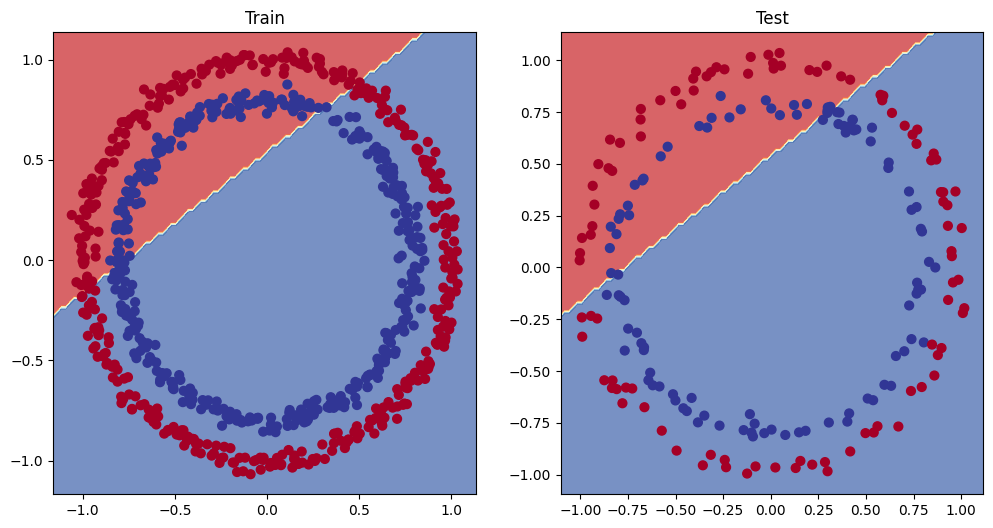

In [ ]:
from helper_functions import plot_decision_boundary

plt.figure(figsize=(12, 6))
plt.subplot(1,2,1)
plt.title("Train")
plot_decision_boundary(model_0, X_train, y_train)
plt.subplot(1,2,2)
plt.title("Test")
plot_decision_boundary(model_0, X_test, y_test)

### 5. Improving a model
* Add more layers - give the model more chances to learn about patterns in the data
* Add more hidden layers - go from 5 hidden units to 10 hidden units
* Fit for longer
* Changing the activation function
* Changing the learning rate
* Changing the loss function


In [ ]:
class CircleModelV1(nn.Module):
  def __init__(self):
    super().__init__()
    self.Layer_1 = nn.Linear(in_features=2, out_features=128)
    self.Layer_2 = nn.ReLU()
    self.Layer_3 = nn.Linear(in_features=128, out_features=256)
    self.Layer_4 = nn.ReLU()
    self.Layer_5 = nn.Linear(in_features=256, out_features=128)
    self.Layer_6 = nn.ReLU()
    self.Layer_7 = nn.Linear(in_features=128, out_features=1)

  def forward(self, x: torch.Tensor):
    return self.Layer_7(self.Layer_6(self.Layer_5(self.Layer_4(self.Layer_3(self.Layer_2(self.Layer_1(x)))))))

model_1 = CircleModelV1()
model_1.to(device)

CircleModelV1(
  (Layer_1): Linear(in_features=2, out_features=128, bias=True)
  (Layer_2): ReLU()
  (Layer_3): Linear(in_features=128, out_features=256, bias=True)
  (Layer_4): ReLU()
  (Layer_5): Linear(in_features=256, out_features=128, bias=True)
  (Layer_6): ReLU()
  (Layer_7): Linear(in_features=128, out_features=1, bias=True)
)

In [ ]:
model_1.state_dict()

OrderedDict([('Layer_1.weight',
              tensor([[-0.0999,  0.7052],
                      [-0.3225,  0.4032],
                      [-0.4769,  0.6129],
                      [-0.6058,  0.2047],
                      [ 0.4822, -0.2078],
                      [ 0.3027, -0.3398],
                      [ 0.6249,  0.1078],
                      [ 0.5299, -0.6100],
                      [-0.5189,  0.6706],
                      [ 0.4731,  0.0166],
                      [ 0.4519,  0.3073],
                      [ 0.6762, -0.3797],
                      [ 0.4173,  0.6490],
                      [ 0.1707, -0.4484],
                      [ 0.6483,  0.5803],
                      [ 0.5308,  0.3436],
                      [ 0.2879,  0.2405],
                      [-0.6586, -0.2754],
                      [ 0.1265, -0.4261],
                      [ 0.6971, -0.2239],
                      [-0.4629,  0.2094],
                      [-0.3653, -0.6929],
                      [-0.5945, -0.6579],
  

In [ ]:
# Create a loss function
loss_fn = nn.BCEWithLogitsLoss()

# Create an optimizer function
optimizer = torch.optim.SGD(params=model_1.parameters(), lr=0.1)


In [ ]:
torch.manual_seed(42)
torch.cuda.manual_seed(42)

# Train for longer
epochs = 1000

# Put the data on the device
X_train = X_train.to(device)
X_test = X_test.to(device)
y_train = y_train.to(device)
y_test = y_test.to(device)

for epoch in range(epochs):
  # Set optimizer to zero_grad
  optimizer.zero_grad()

  # Training
  model_1.train()
  y_logits = model_1(X_train).squeeze()
  y_pred = torch.round(torch.sigmoid(y_logits))
  loss = loss_fn(y_logits, y_train)
  accuracy = accuracy_fn(y_true=y_train, y_pred=y_pred)

  # Backprobagation
  loss.backward()

  # Optimizer step up - gradient descent
  optimizer.step()

  # Testing
  model_1.eval()

  with torch.inference_mode():
    test_logits = model_1(X_test).squeeze()
    test_pred = torch.round(torch.sigmoid(test_logits))
    test_loss = loss_fn(test_logits, y_test)
    test_acc = accuracy_fn(y_true=y_test, y_pred=test_pred)

  if epoch % 100 == 0:
    print(f"Epoch: {epoch} | Loss {loss:.5f} | Accuracy {accuracy:.2f}% || Test_loss: {test_loss:.5f} | Test_accuracy: {test_acc:.2f}%")


Epoch: 0 | Loss 0.69380 | Accuracy 50.00% || Test_loss: 0.69345 | Test_accuracy: 50.00%
Epoch: 100 | Loss 0.67833 | Accuracy 72.75% || Test_loss: 0.68203 | Test_accuracy: 69.50%
Epoch: 200 | Loss 0.62716 | Accuracy 94.12% || Test_loss: 0.63729 | Test_accuracy: 91.00%
Epoch: 300 | Loss 0.50257 | Accuracy 57.75% || Test_loss: 0.53409 | Test_accuracy: 55.00%
Epoch: 400 | Loss 0.37634 | Accuracy 75.50% || Test_loss: 0.41834 | Test_accuracy: 72.00%
Epoch: 500 | Loss 0.04589 | Accuracy 100.00% || Test_loss: 0.07308 | Test_accuracy: 100.00%
Epoch: 600 | Loss 0.01908 | Accuracy 100.00% || Test_loss: 0.03772 | Test_accuracy: 100.00%
Epoch: 700 | Loss 0.01149 | Accuracy 100.00% || Test_loss: 0.02597 | Test_accuracy: 100.00%
Epoch: 800 | Loss 0.00805 | Accuracy 100.00% || Test_loss: 0.02018 | Test_accuracy: 100.00%
Epoch: 900 | Loss 0.00615 | Accuracy 100.00% || Test_loss: 0.01671 | Test_accuracy: 100.00%


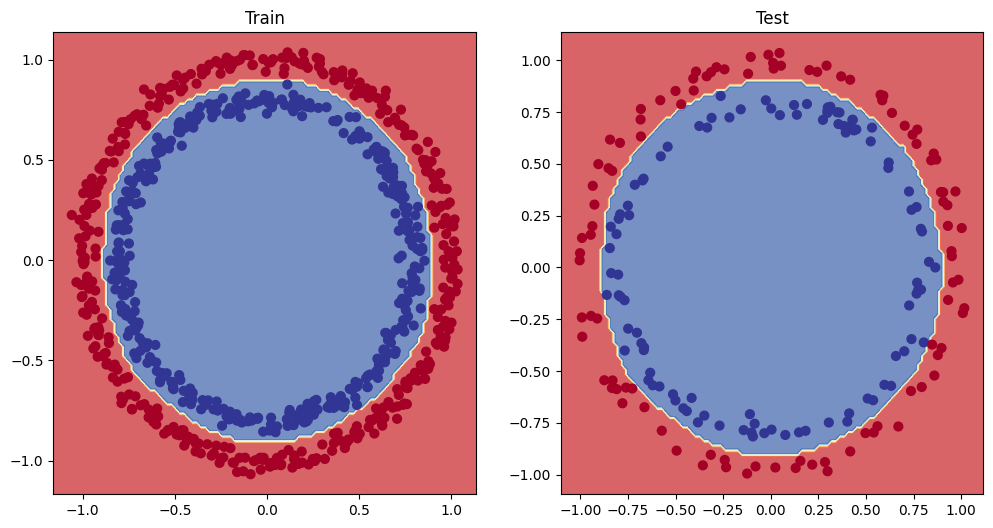

In [ ]:
plt.figure(figsize=(12, 6))
plt.subplot(1,2,1)
plt.title("Train")
plot_decision_boundary(model_1, X_train, y_train)
plt.subplot(1,2,2)
plt.title("Test")
plot_decision_boundary(model_1, X_test, y_test)

## Creating a toy multi-class dataset


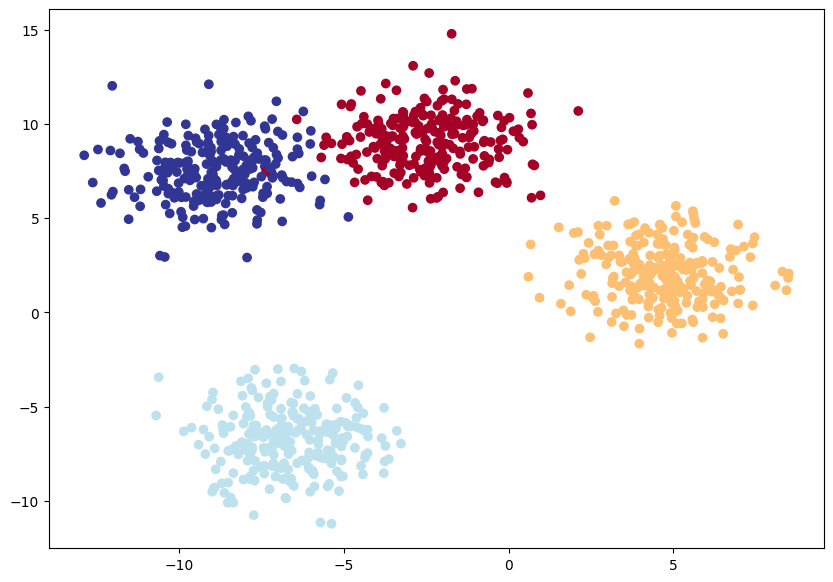

In [ ]:
import torch
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs
from sklearn.model_selection import train_test_split

# Set Hyperparameters
NUM_CLASSES = 4
NUM_FEATURES = 2
RANDOM_SEED = 42

# 1. Make the dataset
X_blob, y_blob = make_blobs(n_samples=1000,
                            n_features=NUM_FEATURES,
                            centers=NUM_CLASSES,
                            cluster_std=1.5,
                            random_state=RANDOM_SEED)

# 2. Split the data into train and test
X_blob_train, X_blob_test, y_blob_train, y_blob_test = train_test_split(X_blob,
                                                                        y_blob,
                                                                        test_size=0.2,
                                                                        random_state=RANDOM_SEED)

# 3. Plot the data (visualize, visualize, visualize)
plt.figure(figsize=(10,7))
plt.scatter(X_blob[:, 0], X_blob[:, 1], c=y_blob, cmap=plt.cm.RdYlBu);

## Building a multiclass classification model in pytorch

In [ ]:
# Set up device agnostic code
device = "cuda" if torch.cuda.is_available() else "cpu"
device

'cpu'

In [ ]:
# Build the multiclass classification model
from torch import nn

class BlobModel(nn.Module):
  def __init__(self, input_features, output_features, hidden_units):
    super().__init__()
    self.Linear_layer_stack = nn.Sequential(
        nn.Linear(in_features=input_features, out_features=hidden_units),
        nn.ReLU(),
        nn.Linear(in_features=hidden_units, out_features=hidden_units),
        nn.ReLU(),
        nn.Linear(in_features=hidden_units, out_features=output_features)
    )

  def forward(self, x):
    return self.Linear_layer_stack(x)

model_4 = BlobModel(input_features=2,
                    output_features=4,
                    hidden_units=8).to(device)
model_4


BlobModel(
  (Linear_layer_stack): Sequential(
    (0): Linear(in_features=2, out_features=8, bias=True)
    (1): ReLU()
    (2): Linear(in_features=8, out_features=8, bias=True)
    (3): ReLU()
    (4): Linear(in_features=8, out_features=4, bias=True)
  )
)

In [ ]:
X_blob_train.shape, y_blob_train.shape

((800, 2), (800,))

In [ ]:
import numpy as np

In [ ]:
torch.unique(torch.from_numpy(y_blob_train.squeeze()))

tensor([0, 1, 2, 3])

In [ ]:
loss_fn = nn.CrossEntropyLoss()

optimizer = torch.optim.SGD(params=model_4.parameters(), lr=0.1)

In [ ]:
model_4.eval()
with torch.inference_mode():
  y_logits = model_4(torch.Tensor(X_blob_test).to(device))
  # test_loss = loss_fn(test_logits, torch.from_numpy(y_blob_test.squeeze()).to(device))
  # test_acc = accuracy_fn(y_true=torch.from_numpy(y_blob_test.squeeze()).to(device), y_pred=test_pred)
y_logits[:5]

tensor([[-0.7646, -0.7412, -1.5777, -1.1376],
        [-0.0973, -0.9431, -0.5963, -0.1371],
        [ 0.2528, -0.2379,  0.1882, -0.0066],
        [-0.4134, -0.5204, -0.9303, -0.6963],
        [-0.3118, -1.3736, -1.1991, -0.3834]])

In [ ]:
y_pred = torch.softmax(y_logits, dim=1)
print(y_logits[:5])
print(y_pred[:15])
# print(''.join(for i in range(5) test_pred[i].argmax()))
print(' '.join(str(y_pred[i].argmax()) for i in range(15)))

tensor([[-0.7646, -0.7412, -1.5777, -1.1376],
        [-0.0973, -0.9431, -0.5963, -0.1371],
        [ 0.2528, -0.2379,  0.1882, -0.0066],
        [-0.4134, -0.5204, -0.9303, -0.6963],
        [-0.3118, -1.3736, -1.1991, -0.3834]])
tensor([[0.3169, 0.3244, 0.1405, 0.2182],
        [0.3336, 0.1432, 0.2026, 0.3206],
        [0.3011, 0.1843, 0.2823, 0.2323],
        [0.3078, 0.2766, 0.1836, 0.2320],
        [0.3719, 0.1286, 0.1532, 0.3463],
        [0.3381, 0.1358, 0.1929, 0.3331],
        [0.2867, 0.1841, 0.2861, 0.2431],
        [0.3554, 0.1355, 0.1740, 0.3351],
        [0.3009, 0.1841, 0.2779, 0.2371],
        [0.3595, 0.1350, 0.1695, 0.3360],
        [0.3496, 0.1389, 0.1822, 0.3294],
        [0.3085, 0.3588, 0.1246, 0.2081],
        [0.3688, 0.1292, 0.1565, 0.3454],
        [0.3644, 0.1276, 0.1598, 0.3483],
        [0.3708, 0.1234, 0.1506, 0.3551]])
tensor(1) tensor(0) tensor(0) tensor(0) tensor(0) tensor(0) tensor(0) tensor(0) tensor(0) tensor(0) tensor(0) tensor(1) tensor(0) tensor(0

In [ ]:
torch.sum(y_pred[1])

tensor(1.0000)

In [ ]:
torch.max(y_pred[1])

tensor(0.3336)

In [ ]:
torch.argmax(y_pred[158])

tensor(0)

In [ ]:
# convert the prediction probabilities to prediction labels
y_pred_label = torch.argmax(y_pred, dim=1)
y_pred_label

tensor([1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 3, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0,
        1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 3, 0, 0, 1, 0, 1, 0, 0, 0,
        0, 0, 0, 0, 3, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0,
        1, 0, 0, 0, 0, 1, 0, 1])

In [ ]:
y_blob_test

array([1, 3, 2, 1, 0, 3, 2, 0, 2, 0, 0, 1, 0, 0, 0, 3, 3, 2, 3, 3, 3, 0,
       1, 2, 2, 2, 3, 0, 1, 0, 3, 1, 1, 3, 1, 2, 1, 3, 0, 2, 0, 3, 3, 2,
       0, 3, 1, 1, 0, 3, 1, 0, 1, 1, 3, 2, 1, 1, 3, 2, 2, 0, 3, 2, 2, 0,
       0, 3, 3, 0, 0, 3, 3, 3, 2, 3, 3, 3, 3, 1, 0, 2, 3, 2, 3, 3, 2, 3,
       3, 2, 3, 3, 1, 3, 3, 3, 1, 0, 3, 2, 0, 0, 3, 0, 2, 3, 1, 0, 3, 2,
       1, 1, 0, 2, 2, 3, 0, 0, 1, 2, 2, 3, 0, 1, 2, 0, 0, 0, 2, 3, 1, 2,
       3, 2, 0, 3, 0, 0, 1, 1, 1, 0, 2, 2, 2, 2, 0, 3, 3, 2, 2, 1, 3, 2,
       0, 0, 3, 3, 2, 1, 2, 0, 3, 2, 0, 3, 2, 0, 2, 2, 2, 0, 3, 1, 1, 1,
       1, 1, 3, 1, 0, 2, 2, 1, 2, 2, 0, 1, 2, 2, 0, 0, 1, 3, 2, 0, 3, 1,
       2, 1])

In [ ]:
type(torch.Tensor(y_blob_train).to(device))

torch.Tensor

In [ ]:
## Creating a training and testing loop for multiclass PyTorch Model

torch.manual_seed(42)
torch.cuda.manual_seed(42)

# Set number of epochs
epocs = 100

# Epocs, loss and accuracy lists
epocs_list = []
loss_list = []
accuracy_list = []
test_loss_list = []
test_accuracy_list = []

# Put data into the device
X_blob_train = torch.Tensor(X_blob_train).to(device)
X_blob_test = torch.Tensor(X_blob_test).to(device)
y_blob_train = torch.Tensor(y_blob_train).to(device)
y_blob_test = torch.Tensor(y_blob_test).to(device)

for epoch in range(epocs):
  # Make gradient to zero for optimizer
  optimizer.zero_grad()

  # Training the model
  model_4.train()
  y_logits = model_4(X_blob_train)
  y_preds = torch.softmax(y_logits, dim=1).argmax(dim=1)

  # Calculate the loss
  loss = loss_fn(y_logits, y_blob_train.type(torch.long))
  accuracy = accuracy_fn(y_pred=y_preds,y_true=y_blob_train)

  # Backpropagate
  loss.backward()

  # Optimizer step
  optimizer.step()

  # Testing Model
  model_4.eval()

  with torch.inference_mode():
    test_logits = model_4(X_blob_test)
    test_pred = torch.softmax(test_logits, dim=1).argmax(dim=1)
    test_loss = loss_fn(test_logits, y_blob_test.type(torch.long))
    test_acc = accuracy_fn(y_pred=test_pred, y_true=y_blob_test)

  if epoch % 10 == 0:
    print(f"Epoch: {epoch} | Loss: {loss:.4f} | Accuracy: {accuracy:.2f}% | Test_Loss: {test_loss:.4} | Test_accuracy: {test_acc:.2f}")
    epocs_list.append(epoch)
    loss_list.append(loss)
    accuracy_list.append(accuracy)
    test_loss_list.append(test_loss)
    test_accuracy_list.append(test_acc)


Epoch: 0 | Loss: 1.1588 | Accuracy: 40.38% | Test_Loss: 1.076 | Test_accuracy: 48.00
Epoch: 10 | Loss: 0.6448 | Accuracy: 96.75% | Test_Loss: 0.6607 | Test_accuracy: 97.50
Epoch: 20 | Loss: 0.4254 | Accuracy: 98.50% | Test_Loss: 0.4307 | Test_accuracy: 100.00
Epoch: 30 | Loss: 0.2529 | Accuracy: 99.12% | Test_Loss: 0.2451 | Test_accuracy: 99.50
Epoch: 40 | Loss: 0.1123 | Accuracy: 99.25% | Test_Loss: 0.1023 | Test_accuracy: 99.50
Epoch: 50 | Loss: 0.0663 | Accuracy: 99.25% | Test_Loss: 0.05848 | Test_accuracy: 99.50
Epoch: 60 | Loss: 0.0507 | Accuracy: 99.25% | Test_Loss: 0.04293 | Test_accuracy: 99.50
Epoch: 70 | Loss: 0.0430 | Accuracy: 99.25% | Test_Loss: 0.03491 | Test_accuracy: 99.50
Epoch: 80 | Loss: 0.0384 | Accuracy: 99.25% | Test_Loss: 0.02988 | Test_accuracy: 99.50
Epoch: 90 | Loss: 0.0352 | Accuracy: 99.25% | Test_Loss: 0.02663 | Test_accuracy: 99.50


## Making and evaluating predictions with PyTorch multiclass model


In [ ]:
# Make predictions
model_4.eval()
with torch.inference_mode():
  y_logits  = model_4(X_blob_test)
y_logits[:5]

tensor([[-0.6249,  5.9860, -7.6323, -8.4470],
        [-2.1738, -6.3750, -3.7202,  3.1203],
        [-3.4102, -3.8958,  3.1567, -2.6119],
        [-1.1505,  4.1962, -3.8472, -4.8820],
        [ 3.7548, -1.3391, -9.1422, -6.9466]])

In [ ]:
y_preds_prob = torch.softmax(y_logits, dim=1)
y_preds_prob[:5]

tensor([[1.3437e-03, 9.9865e-01, 1.2164e-06, 5.3854e-07],
        [4.9905e-03, 7.4740e-05, 1.0630e-03, 9.9387e-01],
        [1.3985e-03, 8.6060e-04, 9.9463e-01, 3.1073e-03],
        [4.7389e-03, 9.9483e-01, 3.1956e-04, 1.1353e-04],
        [9.9388e-01, 6.0966e-03, 2.4904e-06, 2.2378e-05]])

In [ ]:
y_preds = torch.argmax(y_preds_prob, dim=1).type(torch.float)
y_preds[:5]

tensor([1., 3., 2., 1., 0.])

In [ ]:
y_blob_test[:5]

tensor([1., 3., 2., 1., 0.])

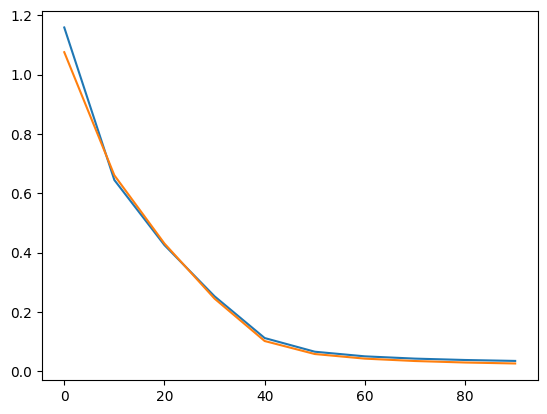

In [ ]:
plt.plot(epocs_list,np.array(torch.Tensor(loss_list).numpy()), label='Training loss')
plt.plot(epocs_list, np.array(torch.Tensor(test_loss_list).numpy()), label='Testing loss')
plt.show()

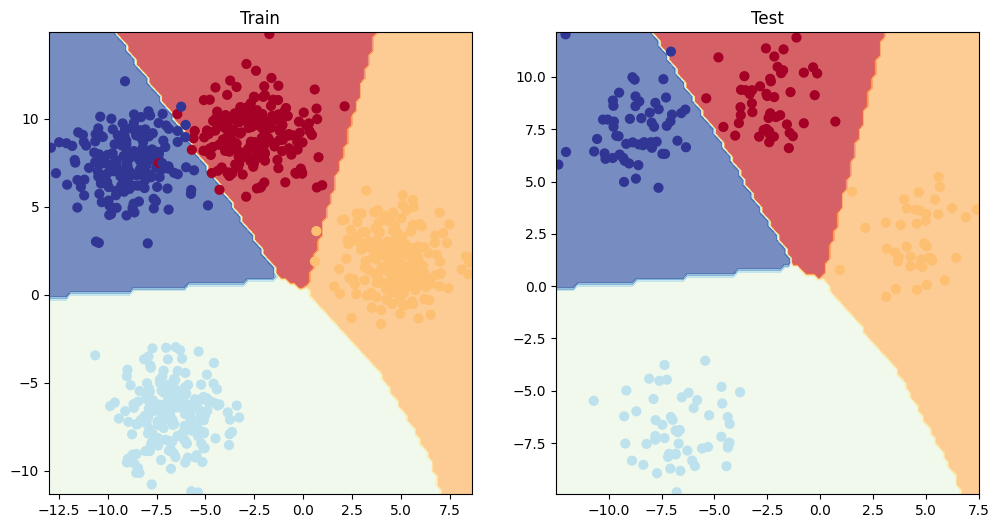

In [ ]:
import matplotlib.pyplot as plt
from helper_functions import plot_decision_boundary

plt.figure(figsize=(12, 6))
plt.subplot(1,2,1)
plt.title("Train")
plot_decision_boundary(model_4, X_blob_train, y_blob_train)
plt.subplot(1,2,2)
plt.title("Test")
plot_decision_boundary(model_4, X_blob_test, y_blob_test)

### A few more classification metrics...
* Accuracy - out of 100 samples how many did our model get it right? - tp+tn/(tp+tn+fp+fn)
* Precision - Higher the value lower the false positives - tp/(tp+fp) - inversely proportional to recall
* Recall - Higher the value lower the false negatives - tp/(tp+fn) - inversely proportional to precision
* F1-score - 2 * (precision * recall)/(precision+recall)
* Confusion matrix
* Classification metric report

In [ ]:
!pip install torchmetrics

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 927.3/927.3 kB 32.7 MB/s eta 0:00:00


In [ ]:
from torchmetrics import Accuracy

# Setup metric
torchmetric_accuracy = Accuracy(task="multiclass", num_classes=4)

# Calculate accuracy
torchmetric_accuracy(y_preds, y_blob_test.type(torch.int64))

tensor(0.9950)